In [1]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
import copy as cp
import matplotlib.gridspec as gridspec
from matplotlib.patches import Polygon

#+____IMPORT FESOM RELATET ROUTINES____________________________________________+
from set_inputarray         import *
from sub_fesom_mesh         import * 
from sub_fesom_data_netcdf4 import * 
from sub_fesom_plot         import *
from sub_fesom_selectbox 	import *
from sub_regriding_adapt 	import *
from colormap_c2c           import *

#+_____________________________________________________________________________+
#|                         *** LOAD FVSOM MESH ***                             |
#+_____________________________________________________________________________+
inputarray  = set_inputarray()
inputarray['save_fig'] = False
#inputarray['save_fig'] = True
inputarray['save_figpath'] = '//home/ollie/pscholz/figures/'

# inputarray['mesh_id'],inputarray['mesh_dir'] = 'COREv2', '/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_finaltopo_mean/'
inputarray['mesh_id'],inputarray['mesh_dir'] = 'COREv2','/work/ollie/pscholz/mesh_fesom2.0/core2_meanz/'
try:
	mesh
except NameError:
    mesh = fesom_init_mesh(inputarray)
    mesh.fesom_calc_landmask()
else:
    if mesh.id!=inputarray['mesh_id']:
        mesh = fesom_init_mesh(inputarray)
        mesh.fesom_calc_landmask()
    else:
        print(' --> ___FOUND {} FESOM MESH --> will use it!___________________________'.format(mesh.id))   


___LOAD FESOM MESH COREv2_________________________________________
 --> read grid files
     > nod2d.out  : #2dn=126858
     > elem2d.out : #2de=244659
     > aux3d.out
     > nlvls.out
     > elvls.out
 --> rotate mesh rot2geo
 --> remove cyclic boundary
_______________________________________________________________
 --> calc landmask contourline


 --> calculate points inside box
[[[-57.0, -48.0], [53.0, 62.0], 'Lab Sea']]


<IPython.core.display.Javascript object>


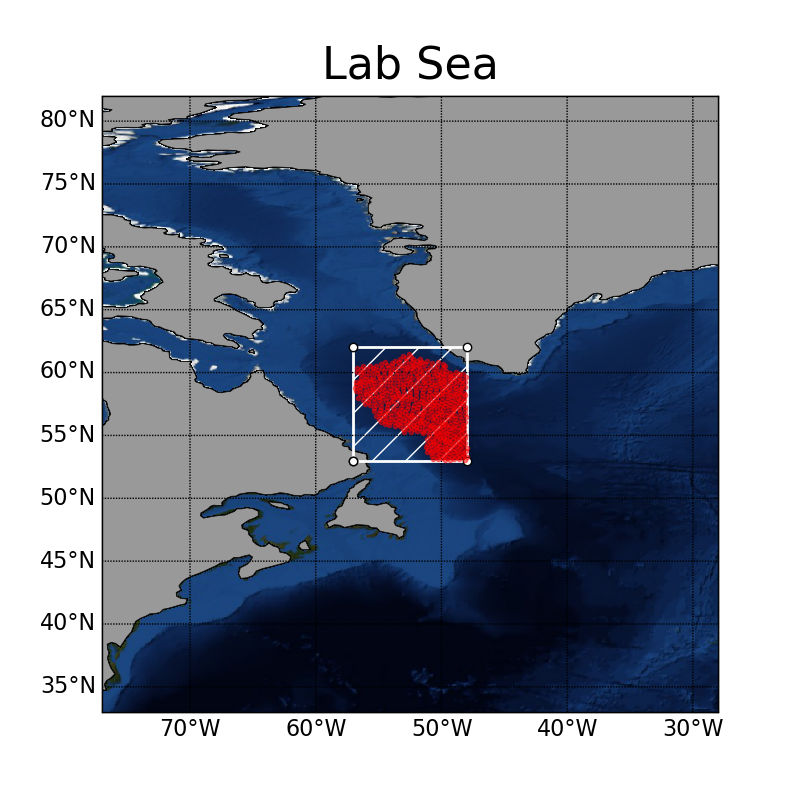

 --> path          : ../results/new_linfs/new_fesom_kpp/3/
 --> year/month/rec: [1989, 2009] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] , []
 --> depth         : []
 --> var           : temp --> var_list: ['temp', [], []]
 --> nti/nsi/ndi   : [1, 126858, 47]
 --> sel_levidx    : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
 --> sel_timeidx   : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]



/home/ollie/pscholz/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice


<IPython.core.display.Javascript object>


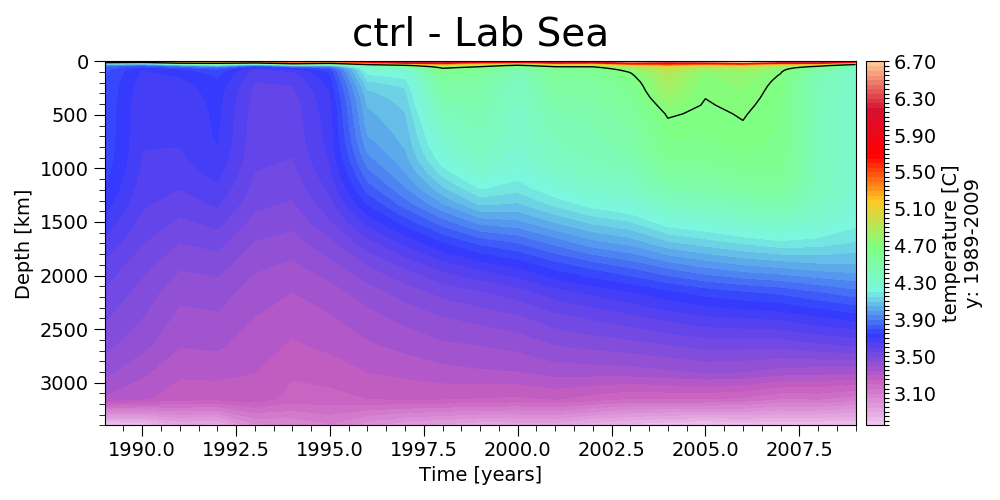

[cmin,cmax,cref] = [2.799999952316284, 6.699999809265137, 4.7]
[cnum]= 40
clevel =  [2.75 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4
 3.45 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1
 4.15 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8
 4.85 4.9  4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45 5.5
 5.55 5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2
 6.25 6.3  6.35 6.4  6.45 6.5  6.55 6.6  6.65 6.7 ]
finish


In [38]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** SET INPUT PARAMETER ***                         |
#|                                                                             |
#+_____________________________________________________________________________+
# setup variable name, runid and data path
box 		      = fesom_box()
box.box_define    =  list([[]]) # --> more boxes ,  list([[],[],...,...]) 
# box.box_define[0] = [ [0.00, 20.00],[-65.00,  -55.00 ],'Weddel Sea' ]
box.box_define[0] = [ [-57.0, -48.0],[53.0,  62.0 ],'Lab Sea' ]
# box.box_define[0] = [ [-180, 180.00],[-90.00,  90.00 ],'globe' ]

#+_____________________________________________________________________________+
box.descript,box.path = 'ctrl' ,'../results/new_linfs/new_fesom_kpp/3/'
box.var           ='temp'
box.which_mean    = 'None'

#+_____________________________________________________________________________+
# select year to average over [start_yr, end_yr]
box.year		  = [1989,2009]

# select month to average over
box.month	      = list(range(1,12+1))

# select linear interpolated depth layers to average over, empty mean use all layers
# don't touch here, should be empty !
box.depth	      = []

# exlude node points whos bottom depth is shallower than botlimit
box.botlimit      = [3000.0]

# make anomaly
# do_anomaly        = True
do_anomaly        = False
if do_anomaly==True:
    box2  = cp.deepcopy(box)
    box2.descript,box2.path = 'tidal' ,'../results/new_linfs/new_fesom_kpp_tidal/3/'
 
#+_____________________________________________________________________________+
#|                                                                             |
#|                           *** ANALYSE BOX ***                               |
#|                                                                             |
#+_____________________________________________________________________________+
# analyse selected box, which points are inside box
print(' --> calculate points inside box')
print(box.box_define)
box.select_pointsinbox(mesh)
if do_anomaly==True:
    box2.box_idx = box.box_idx
box.plot_index_position(mesh)    

#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# load fesom2.0 data over time and depth --> average over points in box 
fesom_load_data_horiz_netcdf4(mesh, box, do_output=True, do_tmean=False)
box.value = np.nanmean(box.value[:,np.where(box.box_idx[0][0:mesh.n2dn])[0]],axis=1)
if do_anomaly==True:
    fesom_load_data_horiz_netcdf4(mesh, box2, do_output=True, do_tmean=False)
    box2.value = np.nanmean(box2.value[:,np.where(box.box_idx[0][0:mesh.n2dn])[0]],axis=1)
    anom = cp.deepcopy(box)
    anom.data_anom(box2,box)

#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** PLOT FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
if do_anomaly==False:
    increace_dezimal = 0
    if box.var=='salt':increace_dezimal = -1
    #___________________________________________________________________________    
    cmax = np.max([np.nanmax(box.value)])
    cmin = np.min([np.nanmin(box.value)])
    if cmax!=0.0: cmax = np.around(cmax, -np.int32(np.floor(np.log10(np.abs(cmax)))-1+increace_dezimal) ) 
    if cmin!=0.0: cmin = np.around(cmin, -np.int32(np.floor(np.log10(np.abs(cmin)))-1+increace_dezimal) ) 
    cref = cmin + (cmax-cmin)/2
    cref = np.around(cref, -np.int32(np.floor(np.log10(np.abs(cref)))-1+increace_dezimal) ) 
    box.cmap = 'odv'
    box.crange=[cmin,cmax,cref]	
    box.cnumb = 40 
    fig2,ax,cax = box.plot_index_t_x_z(do_output=True,which_lines=[0,0,0])
    
if do_anomaly==True:
    increace_dezimal = 0
    if box.var=='salt':increace_dezimal = -1
    #___________________________________________________________________________
    # do common crange for line and lin2
    cmax = np.max([np.nanmax(box.value),np.nanmax(box2.value)])
    cmin = np.min([np.nanmin(box.value),np.nanmin(box2.value)])
    if cmax!=0.0: cmax = np.around(cmax, -np.int32(np.floor(np.log10(np.abs(cmax)))-1+increace_dezimal) ) 
    if cmin!=0.0: cmin = np.around(cmin, -np.int32(np.floor(np.log10(np.abs(cmin)))-1+increace_dezimal) ) 
    cref = cmin + (cmax-cmin)/2
    cref = np.around(cref, -np.int32(np.floor(np.log10(np.abs(cref)))-1+increace_dezimal) ) 
    box.crange=[cmin,cmax,cref]	
    box2.crange=[cmin,cmax,cref]
    
	#___________________________________________________________________________
    fig2,ax,cax = box.plot_index_t_x_z(do_output=False)
    fig2,ax,cax = box2.plot_index_t_x_z(do_output=False)
    fig2,ax,cax = anom.plot_index_t_x_z(do_output=False)

In [ ]:
# if len(box.box_define)==0:
# 	#___________________________________________________________________________
# 	fig, ax = plt.figure(figsize=(10, 10)), plt.gca()
# 	map 	= Basemap(projection = 'cyl',resolution = 'c',
# 				llcrnrlon = -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat = 90)
# 	mx,my 	= map(mesh.nodes_2d_xg, mesh.nodes_2d_yg)
	
# 	#___________________________________________________________________________
# 	tri     = Triangulation(mx, my,mesh.elem_2d_i)
# 	hp1		= plt.tripcolor(tri,-mesh.nodes_2d_zg)
# 	#hp1		=plt.tripcolor(tri,data_anom.value,cmap=cmocean.cm.balance)
# 	#plt.clim(-0.50,0.50)
	
# 	#___________________________________________________________________________
# 	map.drawmapboundary(fill_color='0.9',linewidth=1.0)
# 	# map.bluemarble(scale=0.25)
# 	# map.etopo()
# 	#fesom_plot_lmask(map,mesh,ax,'none','r')
# 	ax.grid(color='k', linestyle='-', linewidth=0.5)
# 	plt.xscale('linear')
# 	plt.yscale('linear')
# 	plt.show(block=False)
# 	fig.canvas.draw()
	
# 	#___________________________________________________________________________
# 	# interactively
# 	box._cid_pressb = fig.canvas.mpl_connect('button_press_event', box._anybutton_)
# 	box._cid_pressk = fig.canvas.mpl_connect('key_press_event', box._anykey_)
# 	box._connect_(fig,ax,map)    